In [1]:
### To-Do
# X) make fit_function general enough for pswarms optimization -> dropout rate, layers, nodes, etc
# X) write function that runs fit_function ~5 times and keeps ensemble + best
# X) put all this in a script
# 4) save output distribution and history plots in model directory
# 5) log file of some kind?
# X) e_sig vs (1-e_bkg) plot
# 7) implement pyswarms optimization
# -) ... 
# N) k-fold validation

In [2]:
import sys, os
sys.path.insert(0, '/home/btannenw/Desktop/ML/dihiggsMLProject/')
from utils.commonFunctions import *

In [3]:
from lorentzBoostAnalyzer import lorentzBoostAnalyzer as lba

Using TensorFlow backend.


Dihiggs file:  /home/btannenw/Desktop/ML/dihiggsMLProject/data/pp2hh4b_500kEvents_0PU_v2-05__top4inPt-4tags-10jets_combined_csv.csv
QCD file:  /home/btannenw/Desktop/ML/dihiggsMLProject/data/ppTo4b_2MEvents_0PU_v2-05__top4inPt-4tags-10jets_combined_csv.csv


(array([3.3195e+04, 4.0870e+04, 2.5949e+04, 1.1225e+04, 3.8130e+03,
        1.1030e+03, 2.6100e+02, 5.6000e+01, 5.0000e+00, 4.0000e+00]),
 array([ 4. ,  4.9,  5.8,  6.7,  7.6,  8.5,  9.4, 10.3, 11.2, 12.1, 13. ]),
 <a list of 10 Patch objects>)

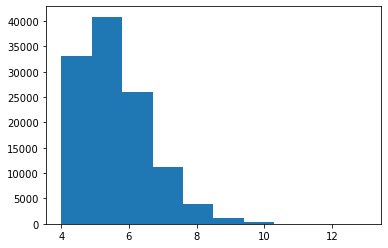

In [4]:
#*** 1. Import data and check stuff
testingFraction = 0.3

# *** A. Import Dataset
hh_raw, qcd_raw = importDatasets()

plt.hist(qcd_raw.nJets, bins=10)

In [5]:
test = lba(nJets=8, signalData= hh_raw, backgroundData = qcd_raw, modelName= 'test', testingFraction=0.3)
test.makeJetVectors()

N_sig = 78876 , N_bkg = 116481
195357 rows of total data with  195357 labels [Train+Test]
136749 rows of training data with  136749 labels [Train]
58608 rows of testing data with  58608 labels [Test]
(136749, 32)


++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 80
nodesInSecondHiddenLayer = 256
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ Begin model training

Train on 136749 samples, validate on 58608 samples
Epoch 1/3
136749/136749 [==============================] - 12s 85us/sample - loss: 0.6018 - categorical_accuracy: 0.6910 - auc: 0.7662 - val_loss: 0.5546 - val_categorical_accuracy: 0.7297 - val_auc: 0.8111
Epoch 2/3
136749/136749 [==============================] - 6s 46us/sample - loss: 0.5359 - categorical_accuracy: 0.7434 - auc: 0.8257 - val_loss: 0.5171 - val_categorical_accuracy: 0.7564 - val_auc: 0.8392
Epoch 3/3
136749/136749 [==============================] - 6s 46us/sample - loss: 0.5074 - categorical_accuracy: 0.7637 - auc: 0.8458 - val_loss: 0.4970 - val_categorical_accuracy: 0.7704 - val_auc: 0.8529
++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/test/

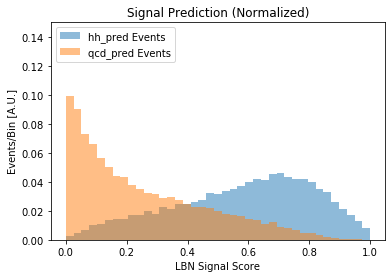

++ Calculating best significance from
23724 34884
nSig = 1992.68 , nBkg = 2693173.27 with significance = 1.214 +/- 0.022 for ff-NN score > 0.707


In [6]:
test.fit_model(epochs=3, batch_size=400)
test.test_model( test.model )
#test.test_model( test.best_model )